In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [34]:
sales_data = pd.read_csv("Advertising Budget and Sales.csv")
sales_data.drop("Unnamed: 0",axis=1,inplace=True)
sales_data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [35]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TV Ad Budget ($)         200 non-null    float64
 1   Radio Ad Budget ($)      200 non-null    float64
 2   Newspaper Ad Budget ($)  200 non-null    float64
 3   Sales ($)                200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


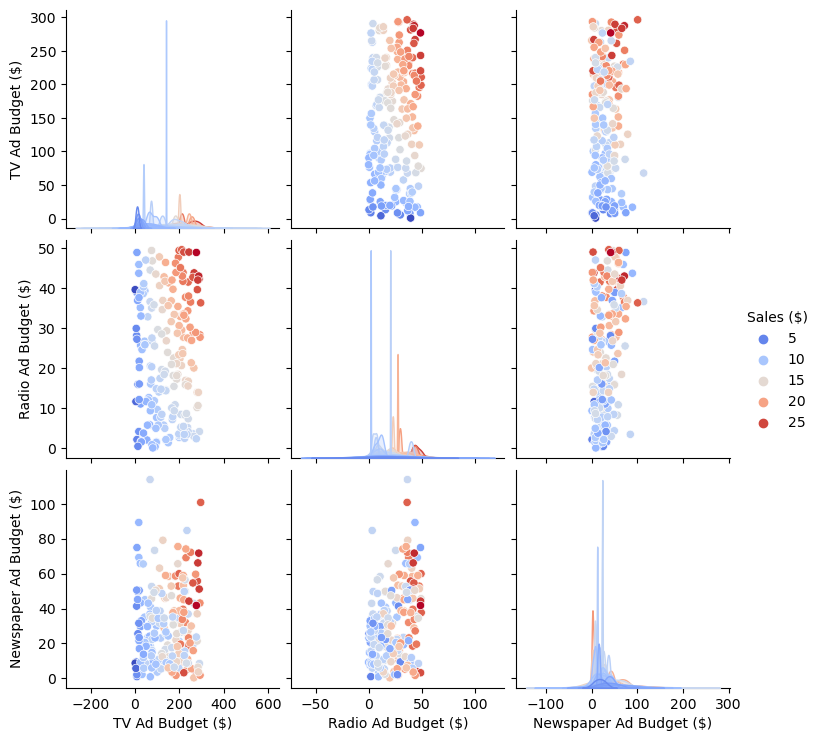

In [36]:
sns.pairplot(sales_data,hue="Sales ($)",palette='coolwarm')

<AxesSubplot:>

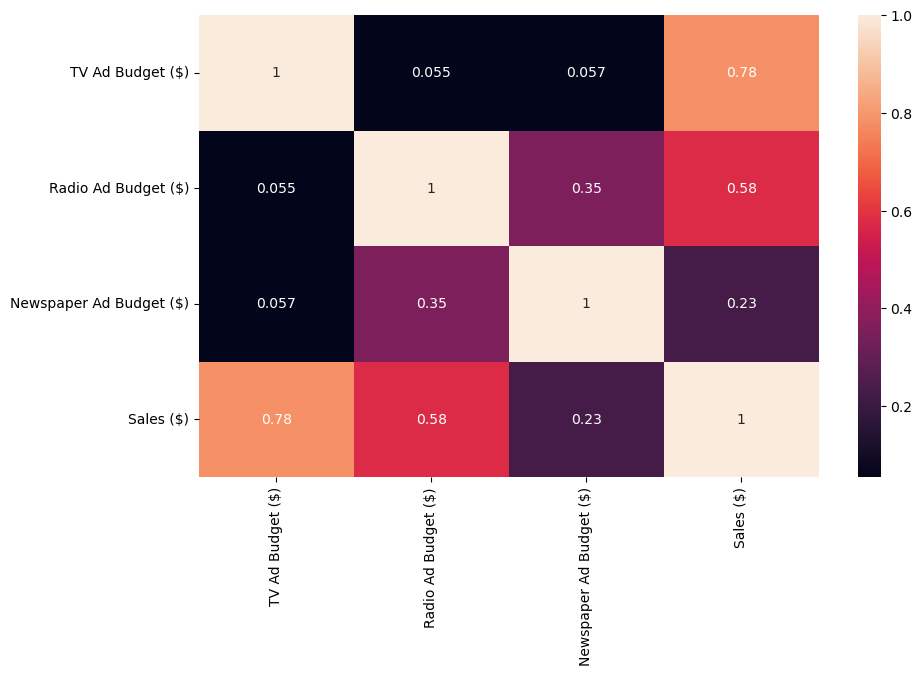

In [37]:
plt.figure(figsize=(10,6))
sns.heatmap(sales_data.corr(),annot=True)

In [38]:
sales_data.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [57]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(sales_data[sales_data.columns[:-1]]))
scaled = scaler.transform(sales_data[sales_data.columns[:-1]])
scaled_data = pd.DataFrame(scaled,columns=[sales_data.columns[:-1]])
scaled_data

StandardScaler()


,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


In [59]:
scaled_data = pd.concat([scaled_data, sales_data[sales_data.columns[-1]]],axis=1)
scaled_data.head()

,"(TV Ad Budget ($),)","(Radio Ad Budget ($),)","(Newspaper Ad Budget ($),)",Sales ($)
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,9.3
3,0.052050,1.217855,1.286405,18.5
4,0.394182,-0.841614,1.281802,12.9


In [61]:
from sklearn.model_selection import train_test_split
X = sales_data[sales_data.columns[:-1]]
y = sales_data[sales_data.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [62]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
preds = lr.predict(X_test)

In [64]:
preds

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

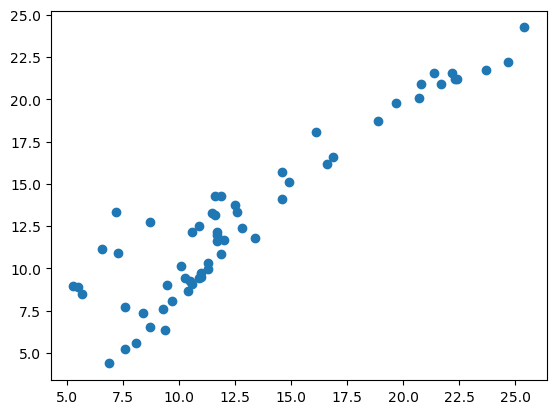

In [69]:
plt.scatter(y_test, preds)

In [70]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, preds))
print('MSE:', metrics.mean_squared_error(y_test, preds))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preds)))

MAE: 1.5116692224549084
MSE: 3.7967972367152183
RMSE: 1.9485372043446383
